**Import necessary libraries**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import pickle
from sklearn import metrics
from sklearn import metrics

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#import dataset
kidney_df = pd.read_csv(".\kidney_disease.csv")
kidney_df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
# Count the occurrences of each unique value in the 'classification' column
kidney_df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [5]:
# Get the number of rows and columns in the DataFrame
kidney_df.shape

(400, 26)

In [6]:
# Drop the 'id' column from the DataFrame as it's not needed for analysis
kidney_df.drop('id', axis=1, inplace=True)

In [7]:
kidney_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# Rename the columns of the DataFrame for better readability and consistency
kidney_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [1]:
# Column descriptions for kidney_df
column_descriptions = {
    'age': 'Age of the patient in years.',
    'blood_pressure': 'Blood pressure in mm/Hg.',
    'specific_gravity': 'Specific gravity of urine; reflects kidney’s ability to concentrate urine.',
    'albumin': 'Amount of albumin (protein) in urine; high levels may indicate kidney issues.',
    'sugar': 'Presence of sugar (glucose) in urine; may relate to diabetes.',
    'red_blood_cells': 'Presence of red blood cells in urine (normal/abnormal).',
    'pus_cell': 'Presence of pus cells (white blood cells) in urine (normal/abnormal).',
    'pus_cell_clumps': 'Presence of clumps of pus cells; indicates infection/inflammation.',
    'bacteria': 'Presence of bacteria in urine (yes/no).',
    'blood_glucose_random': 'Random blood glucose level in mg/dl.',
    'blood_urea': 'Blood urea level in mg/dl; high levels may indicate kidney dysfunction.',
    'serum_creatinine': 'Serum creatinine level in mg/dl; important indicator of kidney health.',
    'sodium': 'Blood sodium level in mEq/L.',
    'potassium': 'Blood potassium level in mEq/L.',
    'haemoglobin': 'Hemoglobin level in gms; low levels can indicate anemia.',
    'packed_cell_volume': 'Volume percentage of red blood cells in blood.',
    'white_blood_cell_count': 'White blood cell (WBC) count per cubic mm of blood.',
    'red_blood_cell_count': 'Red blood cell (RBC) count per cubic mm of blood.',
    'hypertension': 'Whether the patient has high blood pressure (yes/no).',
    'diabetes_mellitus': 'Whether the patient has diabetes (yes/no).',
    'coronary_artery_disease': 'Whether the patient has coronary artery disease (yes/no).',
    'appetite': 'Appetite level (good/poor).',
    'peda_edema': 'Presence of pedal edema (swelling in feet/ankles) (yes/no).',
    'aanemia': 'Presence of anemia (yes/no).',
    'class': 'Target variable: whether the patient has chronic kidney disease (ckd/notckd).'
}

# Display the column descriptions
for col, desc in column_descriptions.items():
    print(f"{col}: {desc}")


age: Age of the patient in years.
blood_pressure: Blood pressure in mm/Hg.
specific_gravity: Specific gravity of urine; reflects kidney’s ability to concentrate urine.
albumin: Amount of albumin (protein) in urine; high levels may indicate kidney issues.
sugar: Presence of sugar (glucose) in urine; may relate to diabetes.
red_blood_cells: Presence of red blood cells in urine (normal/abnormal).
pus_cell: Presence of pus cells (white blood cells) in urine (normal/abnormal).
pus_cell_clumps: Presence of clumps of pus cells; indicates infection/inflammation.
bacteria: Presence of bacteria in urine (yes/no).
blood_glucose_random: Random blood glucose level in mg/dl.
blood_urea: Blood urea level in mg/dl; high levels may indicate kidney dysfunction.
serum_creatinine: Serum creatinine level in mg/dl; important indicator of kidney health.
sodium: Blood sodium level in mEq/L.
potassium: Blood potassium level in mEq/L.
haemoglobin: Hemoglobin level in gms; low levels can indicate anemia.
packed_

In [9]:
kidney_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
#description about dataset
kidney_df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
# information about the dataset
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
# Convert 'packed_cell_volume' to numeric, coercing errors to NaN if conversion fails
kidney_df['packed_cell_volume'] = pd.to_numeric(kidney_df['packed_cell_volume'], errors='coerce')

# Convert 'white_blood_cell_count' to numeric, coercing errors to NaN if conversion fails
kidney_df['white_blood_cell_count'] = pd.to_numeric(kidney_df['white_blood_cell_count'], errors='coerce')

# Convert 'red_blood_cell_count' to numeric, coercing errors to NaN if conversion fails
kidney_df['red_blood_cell_count'] = pd.to_numeric(kidney_df['red_blood_cell_count'], errors='coerce')

In [13]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [14]:
# Display the list of column names in the DataFrame
kidney_df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [15]:
# Identify categorical columns (i.e., columns with object data type)
cat_cols = [col for col in kidney_df.columns if kidney_df[col].dtype == 'object']

# Identify numerical columns (i.e., columns with non-object data types)
num_cols = [col for col in kidney_df.columns if kidney_df[col].dtype != 'object']

In [16]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [17]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [18]:
# Print unique values for each categorical column
for col in cat_cols:
    print(f"{col} has {kidney_df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [19]:
# Clean inconsistent values in the 'diabetes_mellitus' column by removing extra tab and space characters
kidney_df['diabetes_mellitus'].replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)

# Clean inconsistent values in the 'coronary_artery_disease' column by replacing '\tno' with 'no'
kidney_df['coronary_artery_disease'] = kidney_df['coronary_artery_disease'].replace(to_replace='\tno', value='no')

# Standardize values in the 'class' column by fixing formatting inconsistencies
kidney_df['class'] = kidney_df['class'].replace(to_replace={'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [20]:
# Print unique values for specific columns to check if the replacements were successful
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {kidney_df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has ['ckd' 'not ckd']


In [21]:
# Map the 'class' column values ('ckd' -> 0, 'not ckd' -> 1) for binary classification
kidney_df['class'] = kidney_df['class'].map({'ckd': 0, 'not ckd': 1})

# Convert the 'class' column to numeric, coercing any errors to NaN if conversion fails
kidney_df['class'] = pd.to_numeric(kidney_df['class'], errors='coerce')

In [22]:
# Print unique values for specific columns to verify the mapping and conversion were successful
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {kidney_df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has [0 1]


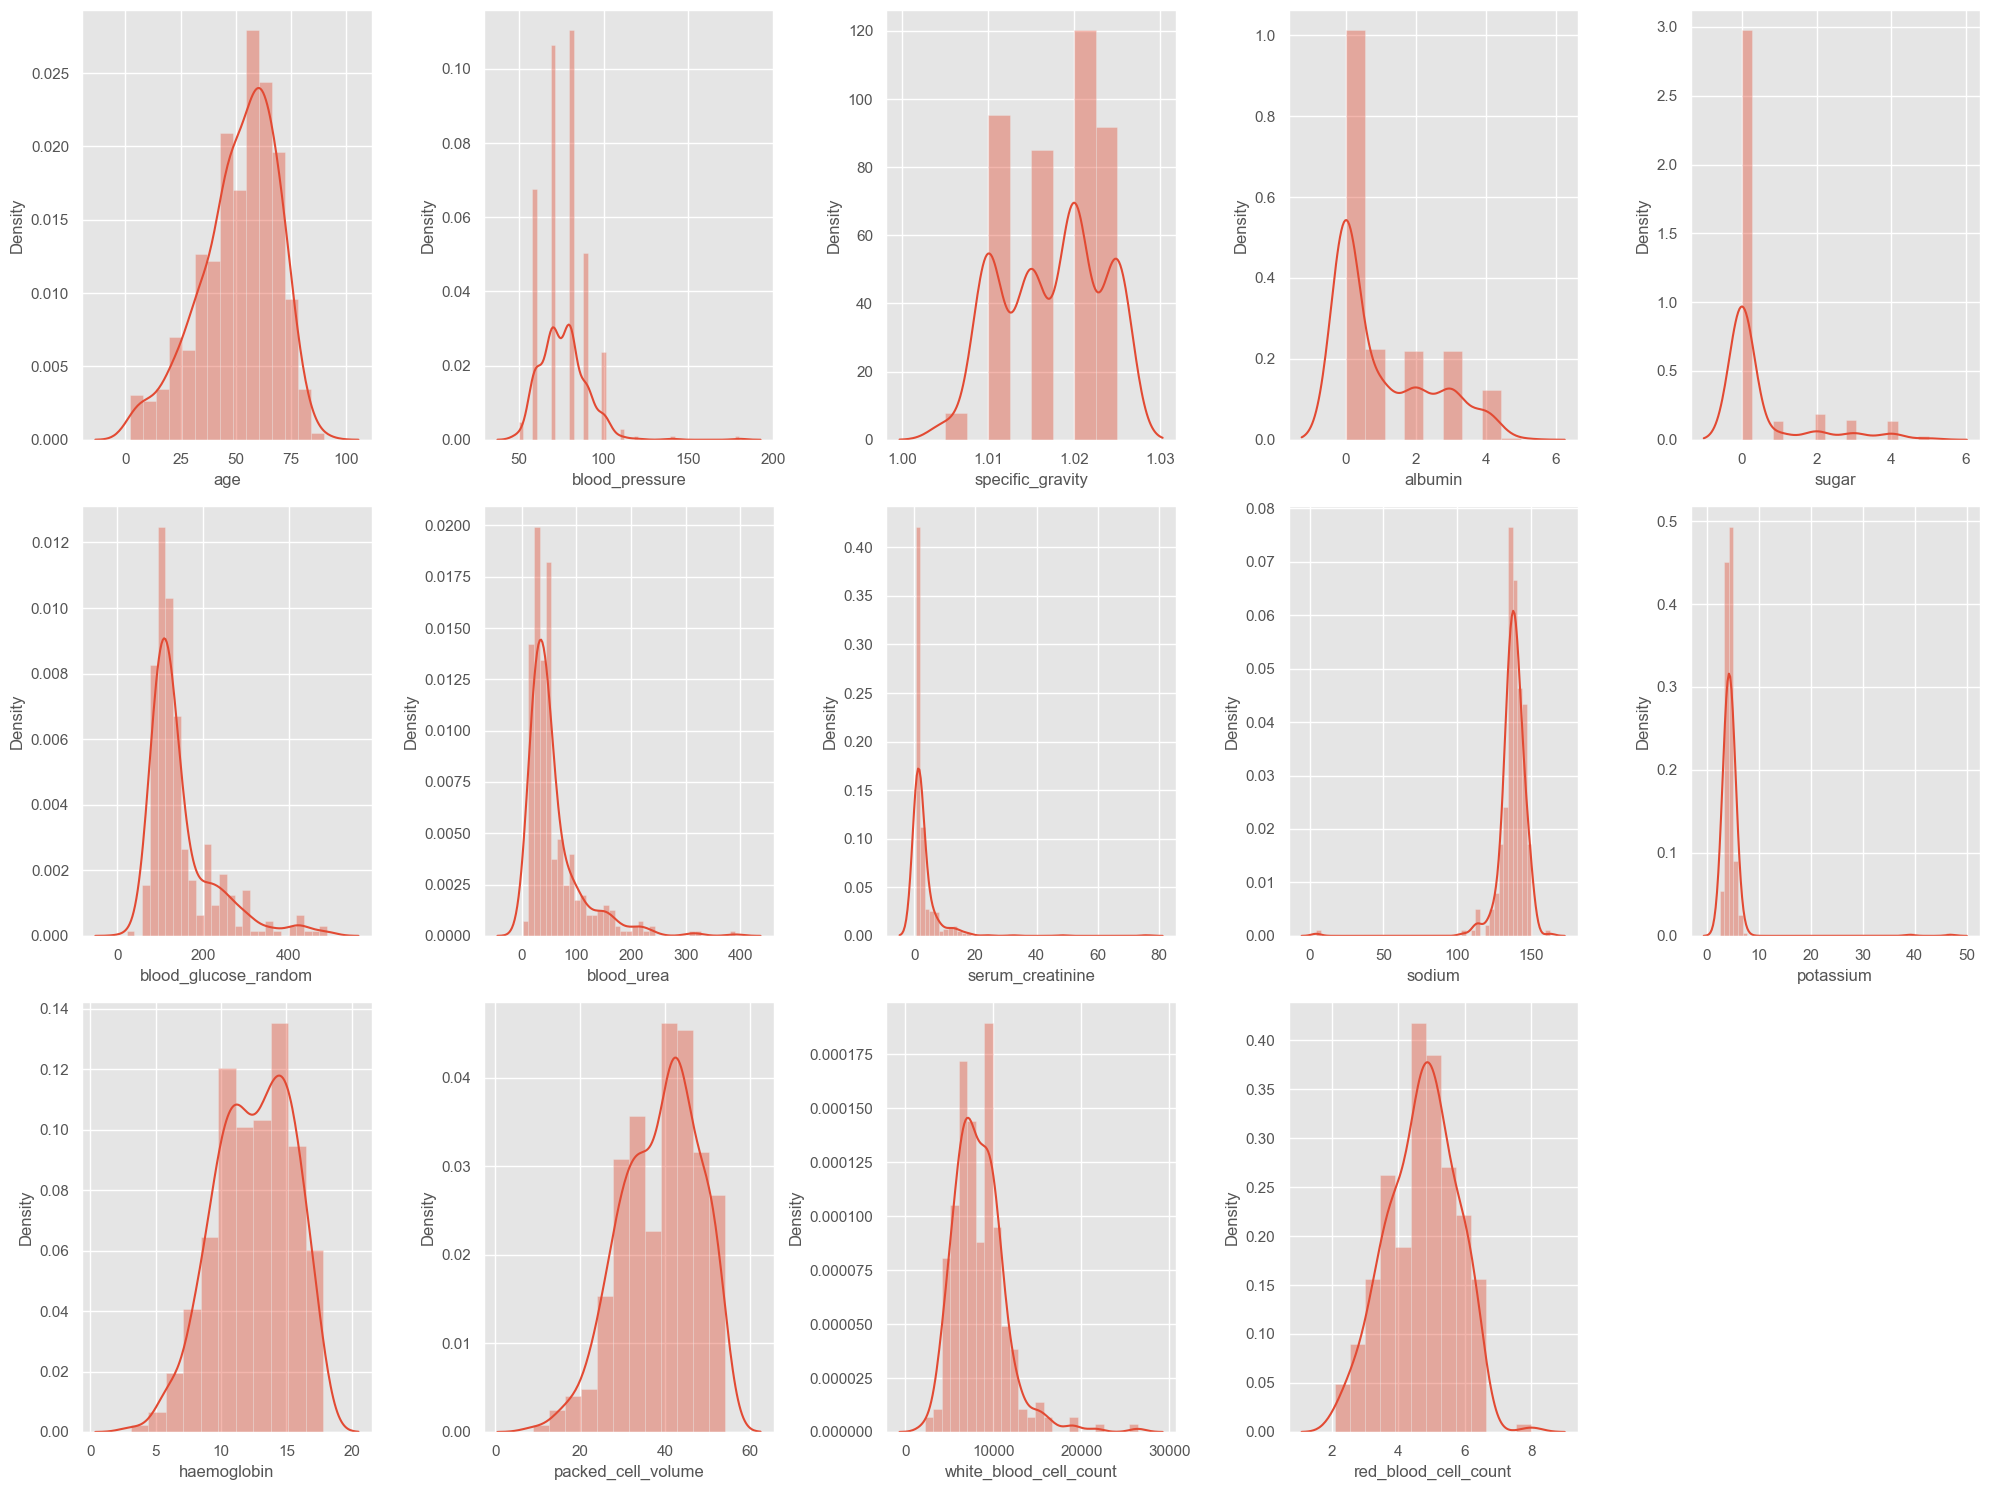

In [23]:
# Set up the figure size for multiple subplots
plt.figure(figsize=(20, 15))
plotnumber = 1

# Iterate through each numerical column and create a distribution plot for it
for column in num_cols:
    if plotnumber <= 14:  # Limit to 14 plots to fit the 3x5 grid layout
        ax = plt.subplot(3, 5, plotnumber)  # Create subplot in a 3x5 grid
        sns.distplot(kidney_df[column])  # Plot the distribution of the column
        plt.xlabel(column)  # Set the x-axis label to the column name
        
    plotnumber += 1

# Adjust subplot layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

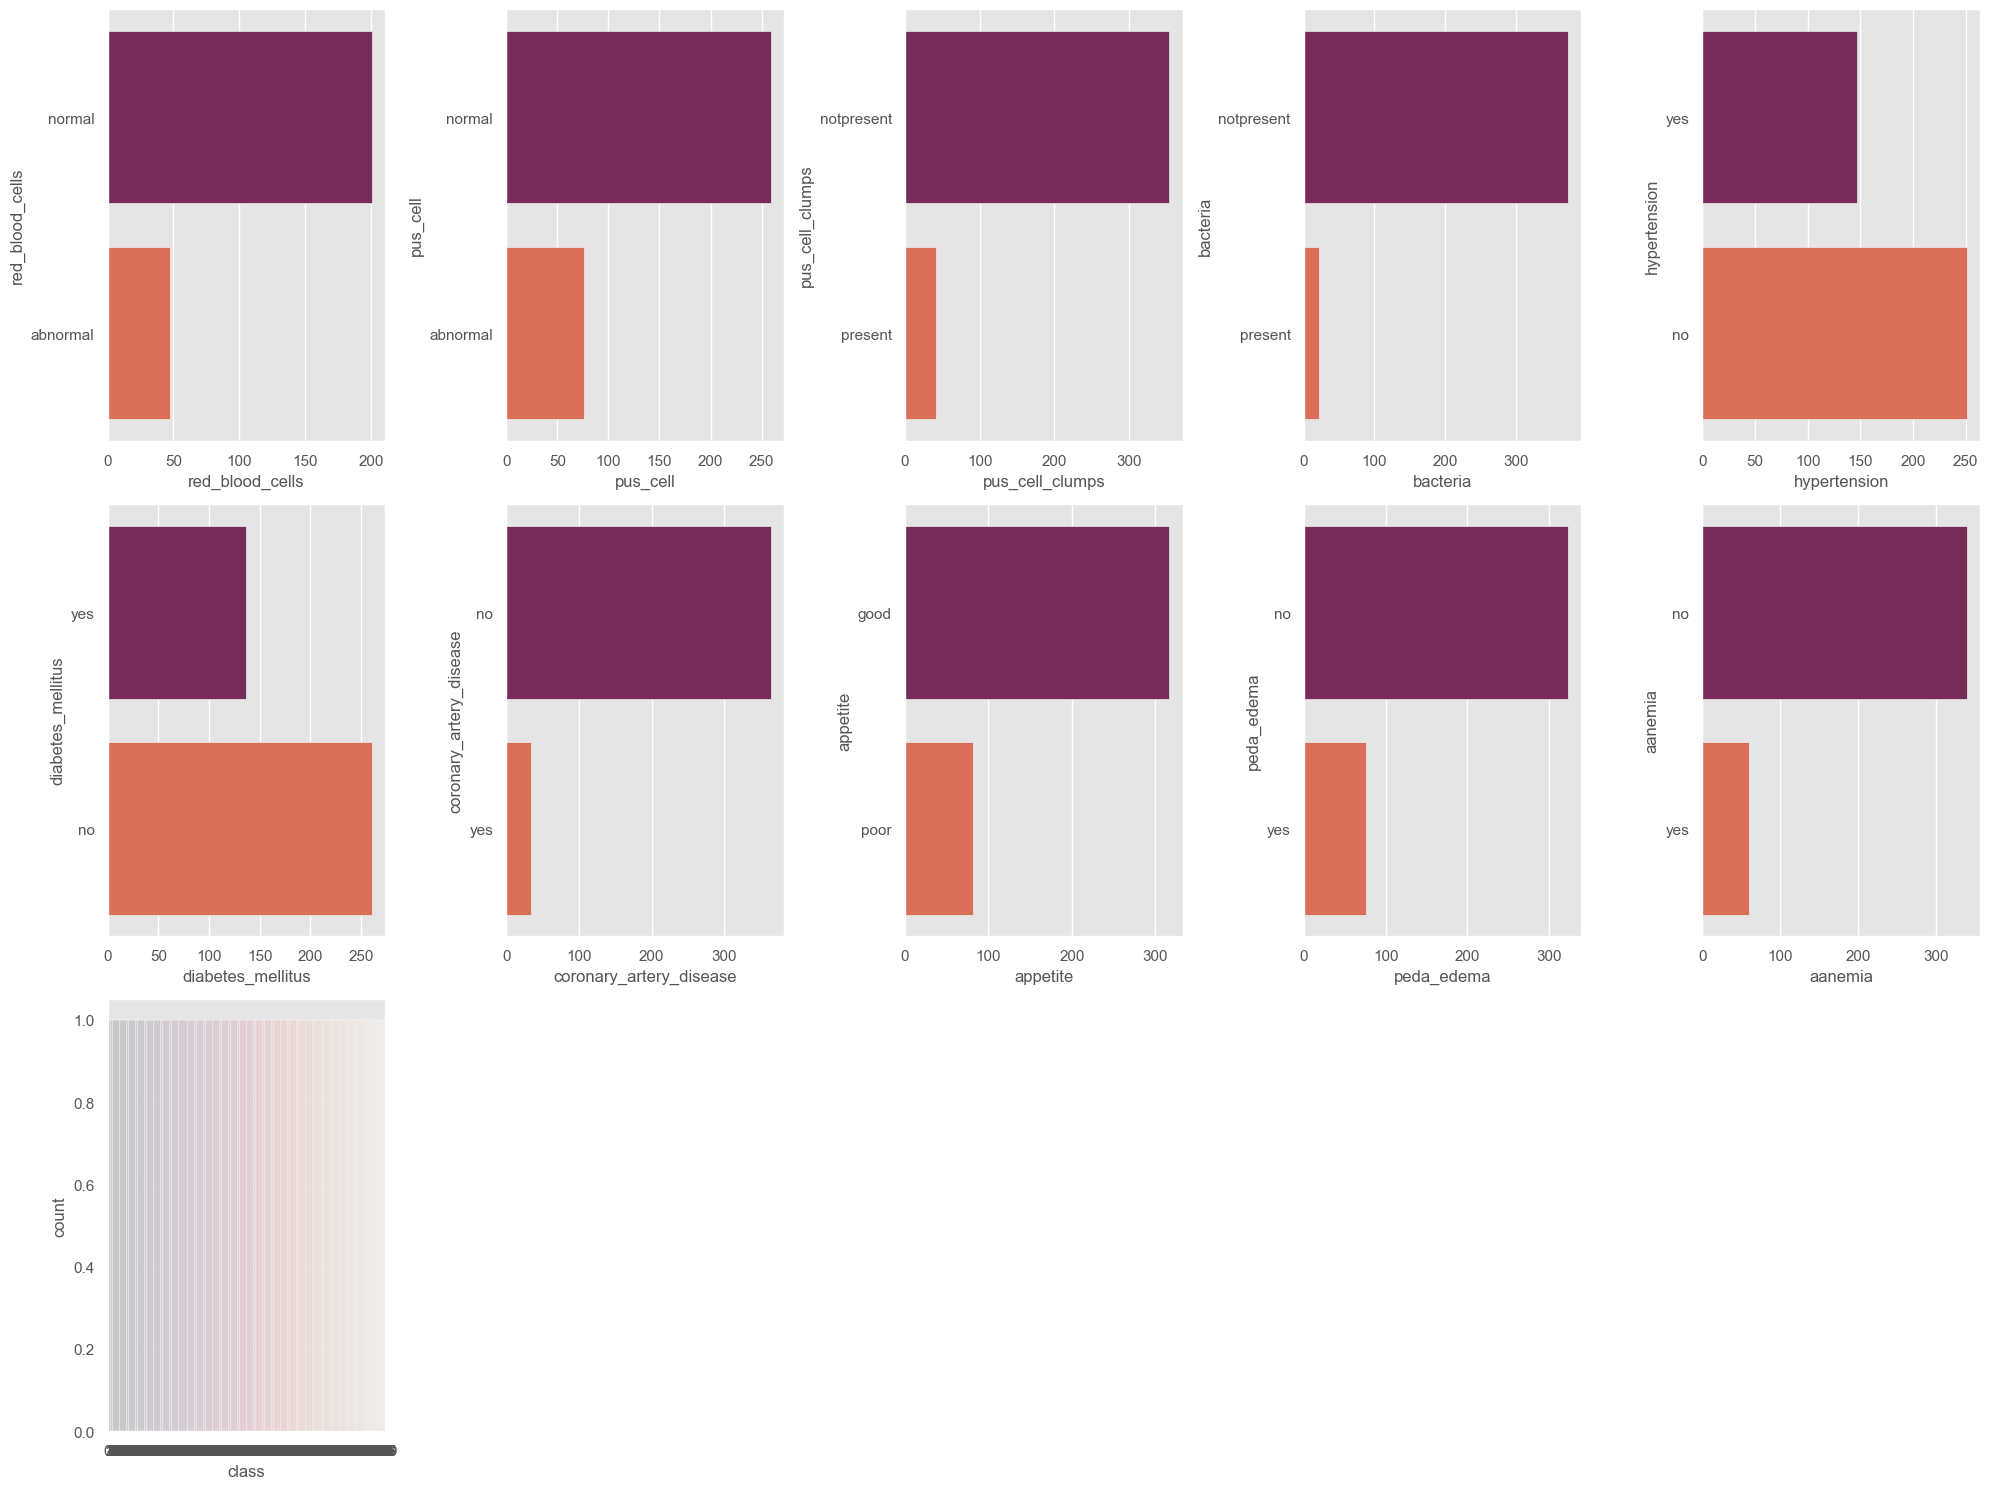

In [24]:
# Set up the figure size for multiple subplots
plt.figure(figsize=(20, 15))
plotnumber = 1

# Iterate through each categorical column and create a count plot for it
for column in cat_cols:
    if plotnumber <= 14:  # Limit to 14 plots to fit the 3x5 grid layout
        ax = plt.subplot(3, 5, plotnumber)  # Create subplot in a 3x5 grid
        sns.countplot(kidney_df[column], palette='rocket')  # Plot the count of each category
        plt.xlabel(column)  # Set the x-axis label to the column name
        
    plotnumber += 1

# Adjust subplot layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [25]:
# Compute the correlation matrix for the numerical columns in the DataFrame
kidney_df[num_cols].corr()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood_pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific_gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood_glucose_random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood_urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum_creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


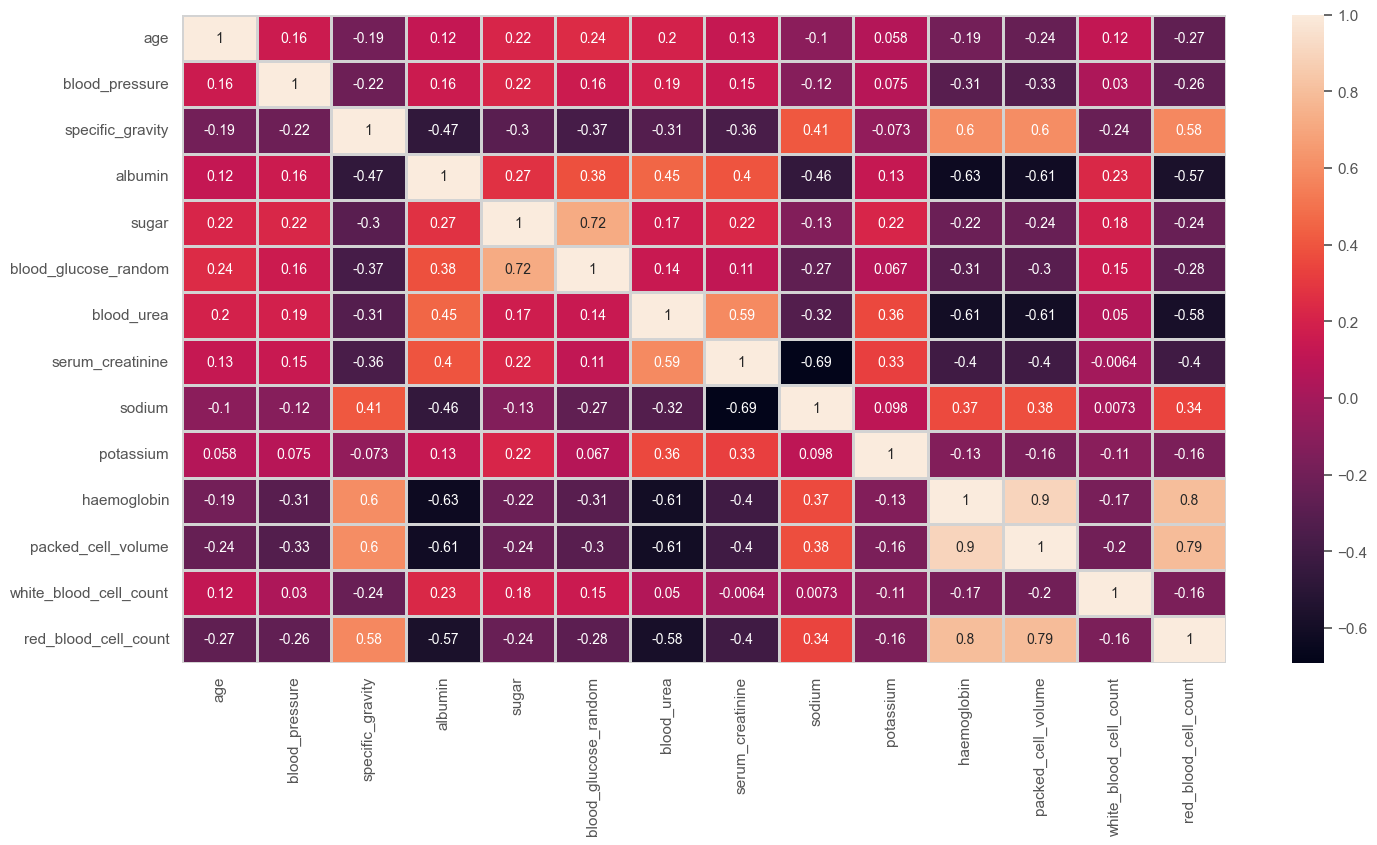

In [26]:
# Set up the figure size for the heatmap
plt.figure(figsize=(15, 8))

# Create a heatmap to visualize the correlation matrix of numerical columns
sns.heatmap(kidney_df[num_cols].corr(), annot=True, linewidth=2, linecolor='lightgray')

# Display the heatmap
plt.show()

**Exploratory data analysis**

In [27]:
# Define a function to create a violin plot for a given column
def voilin(col):
    # Create a violin plot with the given column on the y-axis, class on the x-axis, and color by class
    fig  = px.violin(kidney_df, y=col, x='class', color='class', box=True, template='plotly_dark')
    # Display the figure
    return fig.show()

# Define a function to create a KDE (Kernel Density Estimation) plot for a given column
def kde(col):
    # Create a FacetGrid to generate KDE plots for different classes with the given column
    grid = sns.FacetGrid(kidney_df, hue='class', height=6, aspect=2)
    # Map the KDE plot to the given column
    grid.map(sns.kdeplot, col)
    # Add a legend to the plot
    grid.add_legend()

# Define a function to create a scatter plot between two columns
def scatter_plot(col1, col2):
    # Create a scatter plot with col1 on the x-axis, col2 on the y-axis, and color by class
    fig  = px.scatter(kidney_df, x=col1, y=col2, color="class", template='plotly_dark')
    # Display the figure
    return fig.show()

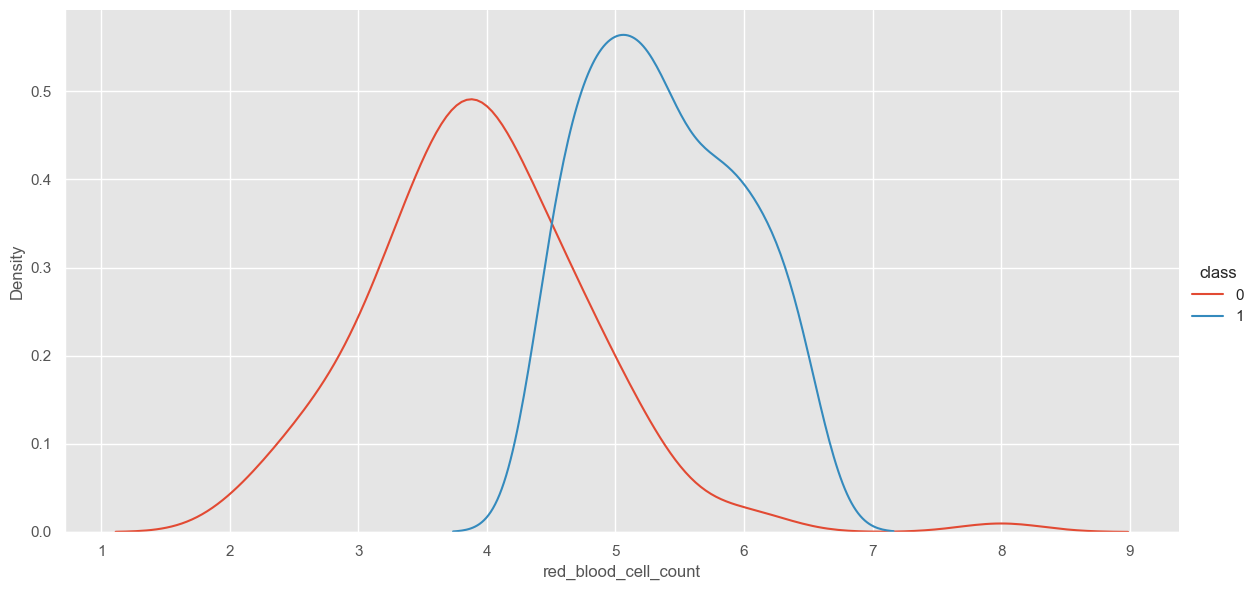

In [28]:
kde('red_blood_cell_count')

**Data Preprocessing**

In [29]:
# checking for missing value
kidney_df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [30]:
# checking for missing value for the numerical columns
kidney_df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [31]:
# checking for missing value for the categorical columns
kidney_df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [32]:
# Define a function for random sampling to impute missing values in a given feature
def random_sampling(feature):
    # Sample random values from the non-null values of the feature, with the same number of missing values
    random_sample = kidney_df[feature].dropna().sample(kidney_df[feature].isna().sum())
    
    # Reindex the random sample to match the indices of the missing values in the feature
    random_sample.index = kidney_df[kidney_df[feature].isnull()].index
    
    # Replace the missing values with the random sample
    kidney_df.loc[kidney_df[feature].isnull(), feature] = random_sample

# Define a function to impute missing values with the mode (most frequent value) of the feature
def impute_mode(feature):
    # Calculate the mode (most frequent value) of the feature
    mode = kidney_df[feature].mode()[0]
    
    # Fill the missing values in the feature with the calculated mode
    kidney_df[feature] = kidney_df[feature].fillna(mode)

In [33]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

In [34]:
kidney_df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [38]:
random_sampling('red_blood_cells')
random_sampling('pus_cell')
# impute missing values with the mode for the categorical value
for col in cat_cols:
    impute_mode(col)

In [39]:
kidney_df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

**Feature Encoding**

In [40]:
# Loop through each column in the list of categorical columns
for col in cat_cols:
    # Print the name of the column and the number of unique values in that column
    print(f"{col} has {kidney_df[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
class has 2


In [ ]:
# Create an instance of the LabelEncoder
le = LabelEncoder()

# Loop through each categorical column in the list 'cat_cols'
for col in cat_cols:
    # Apply label encoding to the column, replacing categorical values with numeric labels
    kidney_df[col] = le.fit_transform(kidney_df[col])

In [43]:
kidney_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,239.0,...,38.0,6000.0,6.4,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


**Model Building**

In [44]:
# Drop the 'class' column from the DataFrame and assign the resulting DataFrame to X
# X contains all features (independent variables) except the target variable 'class'
X = kidney_df.drop('class', axis=1)

# Assign the 'class' column to y as the target variable (dependent variable)
# y contains the values we are trying to predict (the target variable)
y = kidney_df['class']

In [45]:
# Display the column names of the 'X' DataFrame
X.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**k-nearest neighbors algorithm 'KNN'**

In [50]:
# Initialize the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Fit the model to the training data (X_train, y_train)
knn.fit(X_train, y_train)

# Calculate the accuracy score of the model on the test data (X_test, y_tes)
knn_acc = accuracy_score(y_test, knn.predict(X_test))

# Print the training accuracy score by predicting on the training set
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")

# Print the testing accuracy score by predicting on the test set
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")

# Print the confusion matrix to show the performance of the classifier
# This shows how many correct and incorrect predictions the model made
print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test))}\n")

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.78125
Testing Accuracy of KNN is 0.675
Confusion Matrix of KNN is 
 [[34 18]
 [ 8 20]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        52
           1       0.53      0.71      0.61        28

    accuracy                           0.68        80
   macro avg       0.67      0.68      0.66        80
weighted avg       0.71      0.68      0.68        80



**Decision Tree**

In [52]:
# Initialize the DecisionTreeClassifier model
dtc = DecisionTreeClassifier()

# Fit the model to the training data (X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
# Calculate the accuracy score of the model on the test data (X_test, y_test)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

# Print the training accuracy score by predicting on the training set
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")

# Print the testing accuracy score by predicting on the test set
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

# Print the confusion matrix to show the performance of the classifier
# This shows how many correct and incorrect predictions the model made
print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 0.9625
Confusion Matrix of DTC is 
 [[52  0]
 [ 3 25]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.89      0.94        28

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



**Hyper Parameter Tuning**

In [54]:
# Define a dictionary containing hyperparameters to tune for the DecisionTreeClassifier
# These parameters will be used to perform a grid search to find the best combination
GRID_PARAMETER = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 7, 10], 
    'splitter': ['best', 'random'],  
    'min_samples_leaf': [1, 2, 3, 5, 7],  
    'min_samples_split': [1, 2, 3, 5, 7],  
    'max_features': ['auto', 'sqrt', 'log2']  
}

# Initialize GridSearchCV with the DecisionTreeClassifier (dtc), the parameter grid (GRID_PARAMETER),
# 5-fold cross-validation (cv=5), parallel processing (n_jobs=-1), and verbosity (verbose=1)
grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search model to the training data (X_train, y_train)
# This will perform cross-validation and evaluate all hyperparameter combinations from GRID_PARAMETER
grid_search_dtc.fit(X_train, y_train)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [55]:
# best paramer and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.98125


In [56]:
# Retrieve the best model from the grid search (the one with the optimal hyperparameters)
dtc = grid_search_dtc.best_estimator_

# Calculate the accuracy score of the best Decision Tree model on the test data (X_test, y_test)
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

# Print the training accuracy score by predicting on the training set
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")

# Print the testing accuracy score by predicting on the test set
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

# Print the confusion matrix to show the performance of the best Decision Tree classifier
# This matrix indicates how many correct and incorrect predictions the model made
print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 0.975
Testing Accuracy of DTC is 0.9375
Confusion Matrix of DTC is 
 [[51  1]
 [ 4 24]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        52
           1       0.96      0.86      0.91        28

    accuracy                           0.94        80
   macro avg       0.94      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



**Random Forest Classifier**

In [57]:
# Initialize the RandomForestClassifier with specific hyperparameters
rand_clf = RandomForestClassifier(criterion="gini", max_depth=10, max_features="sqrt", min_samples_leaf=1, min_samples_split=7, n_estimators=400)

# Fit the RandomForest model to the training data (X_train, y_train)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [58]:
# Calculate the accuracy score of the RandomForest model on the test data (X_test, y_test)
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))

# Print the training accuracy score by predicting on the training set (X_train)
print(f"Training Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")

# Print the testing accuracy score by predicting on the test set (X_test)
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

# Print the confusion matrix to show the performance of the Random Forest model
# This matrix shows the true positives, false positives, true negatives, and false negatives
print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(f"Classification Report of Random Forest is \n{classification_report(y_test, rand_clf.predict(X_test))}")

Training Accuracy of Random Forest is 1.0
Testing Accuracy of Random Forest is 0.975
Confusion Matrix of Random Forest is 
 [[52  0]
 [ 2 26]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



**XgBoost**

In [62]:
# Initialize the XGBClassifier with specific hyperparameters
xgb = XGBClassifier(objective="binary:logistic", learning_rate=0.001, max_depth=10, n_estimators=100)

# Fit the XGBClassifier model to the training data (X_train, y_train)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
# Calculate the accuracy score of the XGB model on the test data (X_test, y_test)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

# Print the training accuracy score by predicting on the training set (X_train)
print(f"Training Accuracy of XGB is {accuracy_score(y_train, xgb.predict(X_train))}")

# Print the testing accuracy score by predicting on the test set (X_test)
print(f"Testing Accuracy of XGB is {accuracy_score(y_test, xgb.predict(X_test))}")

# Print the confusion matrix to show the performance of the XGB model
# This matrix shows the true positives, false positives, true negatives, and false negatives
print(f"Confusion Matrix of XGB is \n {confusion_matrix(y_test, xgb.predict(X_test))}\n")

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(f"Classification Report of XGB is \n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGB is 0.61875
Testing Accuracy of XGB is 0.65
Confusion Matrix of XGB is 
 [[52  0]
 [28  0]]

Classification Report of XGB is 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



**Logistic Regression**

In [66]:
# Initialize the Logistic Regression model and fit it to the training data (X_train, y_train)
lr = LogisticRegression()
# Train the Logistic Regression model on the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Calculate the accuracy score of the Logistic Regression model on the test data (X_test, y_test)
lr_acc = accuracy_score(y_test, lr.predict(X_test))

# Print the training accuracy score by predicting on the training set (X_train)
print(f"Training Accuracy of LR is {accuracy_score(y_train, lr.predict(X_train))}")

# Print the testing accuracy score by predicting on the test set (X_test)
print(f"Testing Accuracy of LR is {accuracy_score(y_test, lr.predict(X_test))}")

# Print the confusion matrix to show the performance of the Logistic Regression model
# This matrix shows the true positives, false positives, true negatives, and false negatives
print(f"Confusion Matrix of LR is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(f"Classification Report of LR is \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of LR is 0.915625
Testing Accuracy of LR is 0.9375
Confusion Matrix of LR is 
 [[49  3]
 [ 2 26]]

Classification Report of LR is 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



**Support Vector Machine**

In [68]:
# Initialize the Support Vector Classifier (SVC) model with probability estimates enabled
svm = SVC(probability=True)

# Define a parameter grid for hyperparameter tuning using GridSearchCV
parameter = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],  # Possible values for gamma hyperparameter
    'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]  # Possible values for C hyperparameter
}

# Initialize GridSearchCV with the SVC model and the parameter grid
grid_search = GridSearchCV(svm, parameter)

# Fit the grid search to the training data (X_train, y_train) to find the optimal hyperparameters
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [72]:
# Print the best hyperparameters found by GridSearchCV after evaluating all possible combinations
print(grid_search.best_params_)

# Print the best score achieved by the model with the optimal hyperparameters
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.0001}
0.759375


In [73]:
# Initialize the Support Vector Classifier (SVC) model with the optimal hyperparameters found during grid search
svm = SVC(gamma=0.0001, C=10, probability=True)

# Fit the SVC model on the training data (X_train, y_train) using the optimal hyperparameters
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.0001, probability=True)

In [74]:
# Calculate the accuracy of the SVC model on the test set (X_test, y_test)
svm_acc = accuracy_score(y_test, svm.predict(X_test))

# Print the training accuracy of the SVC model
print(f"Training Accuracy of SVC is {accuracy_score(y_train, svm.predict(X_train))}")

# Print the testing accuracy of the SVC model
print(f"Testing Accuracy of SVC is {accuracy_score(y_test, svm.predict(X_test))}")

# Print the confusion matrix of the SVC model
print(f"Confusion Matrix of SVC is \n {confusion_matrix(y_test, svm.predict(X_test))}\n")

# Print the classification report of the SVC model
print(f"Classification Report of SVC is \n{classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of SVC is 0.9875
Testing Accuracy of SVC is 0.675
Confusion Matrix of SVC is 
 [[39 13]
 [13 15]]

Classification Report of SVC is 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        52
           1       0.54      0.54      0.54        28

    accuracy                           0.68        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.68      0.68      0.68        80



**Gradient Boosting**

In [75]:
# Initialize the Gradient Boosting Classifier (GBC) model
gbc = GradientBoostingClassifier()

# Define the parameter grid to search over for hyperparameter tuning
PARAMETERS = {
    'loss': ['log_loss', 'exponential'],  # The loss function to be used for boosting
    'learning_rate': [0.001, 0.1, 1, 10],  # The step size to update the model’s weights
    'n_estimators': [100, 150, 180, 200]  # The number of boosting stages (weak models) to use
}

# Set up GridSearchCV to perform an exhaustive search over the hyperparameter grid
grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose=1)

# Fit the GridSearchCV to the training data (X_train, y_train) to find the best hyperparameters
# The grid search will try all combinations of parameters and return the best performing model
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [77]:
print(grid_search_gbc.best_params_)
print(grid_search_gbc.best_score_)

{'learning_rate': 1, 'loss': 'log_loss', 'n_estimators': 150}
0.978125


In [80]:
# Initialize the Gradient Boosting Classifier (GBC) model with the best hyperparameters
gbc = GradientBoostingClassifier(learning_rate=1, loss='log_loss', n_estimators=150)

# Fit the Gradient Boosting Classifier on the training data (X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=150)

In [81]:
# Calculate the accuracy score of the trained Gradient Boosting Classifier (GBC) on the test data
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))

# Print the training accuracy of the GBC model
print(f"Training Accuracy of GBC is {accuracy_score(y_train, gbc.predict(X_train))}")

# Print the testing accuracy of the GBC model
print(f"Testing Accuracy of GBC is {accuracy_score(y_test, gbc.predict(X_test))}")

# Print the confusion matrix of the GBC model on the test data
print(f"Confusion Matrix of GBC is \n {confusion_matrix(y_test, gbc.predict(X_test))}\n")

# Print the classification report of the GBC model on the test data
# The classification report includes precision, recall, f1-score, and support for each class in the target variable
print(f"Classification Report of GBC is \n{classification_report(y_test, gbc.predict(X_test))}")

Training Accuracy of GBC is 1.0
Testing Accuracy of GBC is 0.9625
Confusion Matrix of GBC is 
 [[52  0]
 [ 3 25]]

Classification Report of GBC is 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.89      0.94        28

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



**Model Comparison**

In [82]:
# Create a DataFrame to store the performance scores of different models
# The 'Model' column contains the names of the models used
# The 'Score' column contains the corresponding accuracy scores for each model
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'DT', 'Random Forest Classifier', 'XgBoost', 'Gradient Boosting'],
    'Score': [lr_acc, knn_acc, svm_acc, dtc_acc, rand_clf_acc, xgb_acc, gbc_acc]
})

# Sort the models by their accuracy score in descending order
# This will help to view which model performed the best based on the accuracy score
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest Classifier,0.9750
6,Gradient Boosting,0.9625
0,Logistic Regression,0.9375
3,DT,0.9375
1,KNN,0.6750
2,SVM,0.6750
5,XgBoost,0.6500


In [ ]:
# Save the trained Random Forest Classifier (rand_clf) model to a file using pickle
model = rand_clf
pickle.dump(model, open('.\saved_modeles\kidney.pkl', 'wb'))

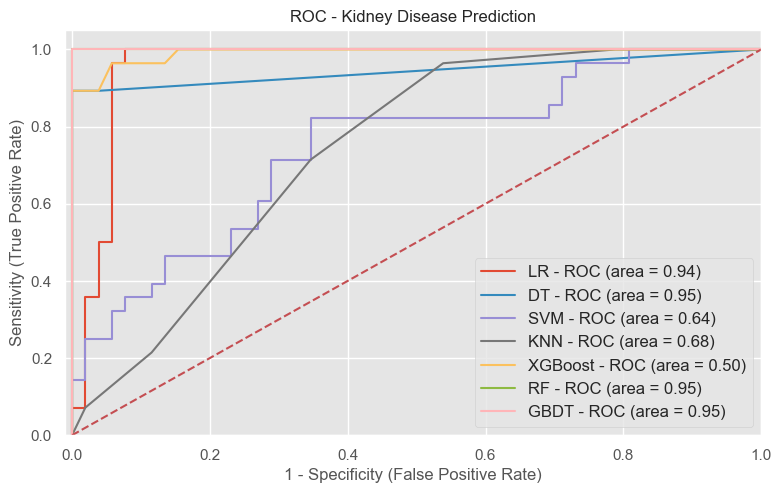

In [86]:
# Compares the performance of different machine learning models by plotting their ROC (Receiver Operating Characteristic) 
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[93.75, 93.75, 67.5, 67.5, 65.0, 97.5, 96.25]
[np.float64(93.54), np.float64(97.25), np.float64(64.29), np.float64(68.41000000000001), np.float64(50.0), np.float64(94.64), np.float64(94.64)]


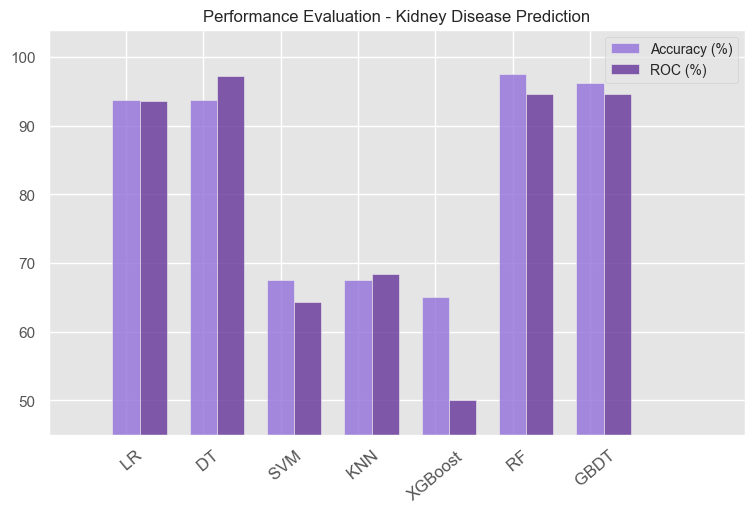

In [87]:
# Compares the performance of different machine learning models by plotting their Accuracy and their ROC
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svm_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)


n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)


fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()